<a href="https://colab.research.google.com/github/ImmortalizedInHearts/NeuralNetwork/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [31]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
  
def derivSigmoid(x):
  return sigmoid(x) * (1 - sigmoid(x))  

def mseLoss(y_true, y_pred):
  return ((y_true - y_pred) ** 2).mean()

In [36]:
class NeuralNetwork:
  def __init__(self):
    # weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()
    
    # bias
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

    # loss
    self.loss = list()

    # prediction
    self.ypreds = list() 

    # confMatrix
    self.confMatrix = [[0 for x in range(2)] for i in range(2)]
    
  def feedforward(self, x):
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)

    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
        learn_rate = 0.1
        epochs = 1000 
 
        for epoch in tqdm(range(epochs)):
            for x, y_true in zip(data, all_y_trues):
                # backprop
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)
 
                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)
 
                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1
 
                dL_dypred = -2 * (y_true - y_pred)
 
                # Neuron o1
                dypred_dw5 = h1 * derivSigmoid(sum_o1)
                dypred_dw6 = h2 * derivSigmoid(sum_o1)
                dypred_db3 = derivSigmoid(sum_o1)
 
                dypred_dh1 = self.w5 * derivSigmoid(sum_o1)
                dypred_dh2 = self.w6 * derivSigmoid(sum_o1)
 
                # Neuron h1
                dh1_dw1 = x[0] * derivSigmoid(sum_h1)
                dh1_dw2 = x[1] * derivSigmoid(sum_h1)
                dh1_db1 = derivSigmoid(sum_h1)
 
                # Neuron h2
                dh2_dw3 = x[0] * derivSigmoid(sum_h2)
                dh2_dw4 = x[1] * derivSigmoid(sum_h2)
                dh2_db2 = derivSigmoid(sum_h2)
 
                """ Weights and bias updating """
                # Neuron h1
                self.w1 -= learn_rate * dL_dypred * dypred_dh1 * dh1_dw1
                self.w2 -= learn_rate * dL_dypred * dypred_dh1 * dh1_dw2
                self.b1 -= learn_rate * dL_dypred * dypred_dh1 * dh1_db1
 
                # Neuron h2
                self.w3 -= learn_rate * dL_dypred * dypred_dh2 * dh2_dw3
                self.w4 -= learn_rate * dL_dypred * dypred_dh2 * dh2_dw4
                self.b2 -= learn_rate * dL_dypred * dypred_dh2 * dh2_db2
 
                # Neuron o1
                self.w5 -= learn_rate * dL_dypred * dypred_dw5
                self.w6 -= learn_rate * dL_dypred * dypred_dw6
                self.b3 -= learn_rate * dL_dypred * dypred_db3
 
            """ Loss calculation """
            self.ypreds = np.apply_along_axis(self.feedforward, 1, data) 
            self.loss.append(mseLoss(all_y_trues, self.ypreds))

In [37]:
data = np.array([
    [-2, -1],    # Alice
    [25, 6],     # Bob
    [17, 4],     # Charlie
    [-15, -6], # Diana
])
 
all_y_trues = np.array([
    1, # Alice
    0, # Bob
    0, # Charlie
    1, # Diana
])
 
network = NeuralNetwork()
network.train(data, all_y_trues)

100%|██████████| 1000/1000 [00:00<00:00, 1943.95it/s]


In [38]:
for index in range(len(network.ypreds)):
  network.confMatrix[all_y_trues[index]][int(np.around(network.ypreds[index]))] += 1

In [39]:
network.confMatrix

[[2, 0], [0, 2]]

In [42]:
np.mean([network.confMatrix[i][i] for i in range(2)])

2.0

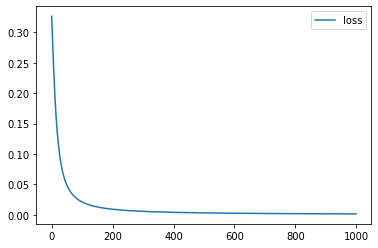

In [43]:
plt.plot(network.loss, label='loss')
plt.legend()